# Practice project-6 Advertising Sales Channel Prediction

In [1]:
import pandas as pd


import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.iloc[:,-1]

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Understanding the Datasets

There are 4 columns in the dataset namely:

 TV : It shows how much advertising done by Television.
 
 radio: It shows how much advertising done by radio.
 
 newspaper:It shows how much advertising done by newspaper.
 
 sales :Target column which predicting the sales of all advertising channel.

In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Unnamed column has not such data that we can use for further process. Ih has only the index like data , So its better to drop this column.

In [5]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# EDA

# Visualization

<AxesSubplot:xlabel='TV', ylabel='Density'>

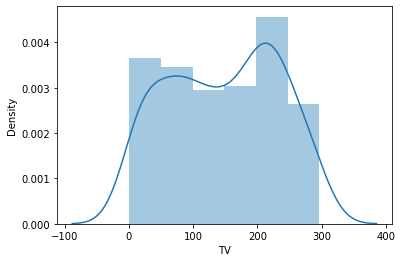

In [8]:
import seaborn as sns
sns.distplot(df['TV'],kde=True)

It is observed that TV advertising sales ranges from 0 to 300

<AxesSubplot:xlabel='radio', ylabel='Density'>

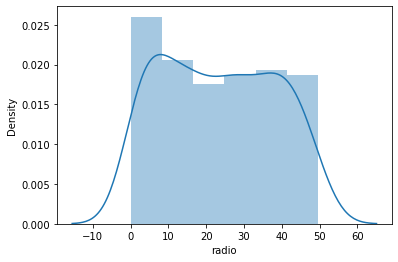

In [9]:
sns.distplot(df['radio'],kde=True)

It is observed that radio advertising sales ranges from 0 to 49

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

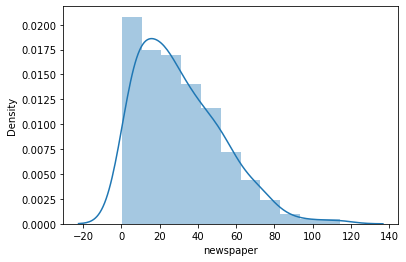

In [10]:
sns.distplot(df['newspaper'],kde=True)

It is observed that newspaper advertising sales ranges from 0 to 140

<AxesSubplot:xlabel='sales', ylabel='Density'>

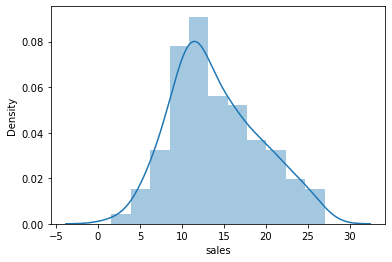

In [11]:
sns.distplot(df['sales'],kde=True)

It is observed that  sales the target column ranges from 2 to 27

<AxesSubplot:xlabel='TV', ylabel='Count'>

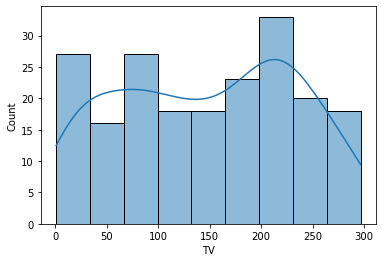

In [12]:
sns.histplot(df['TV'],kde=True)

<AxesSubplot:xlabel='radio', ylabel='Count'>

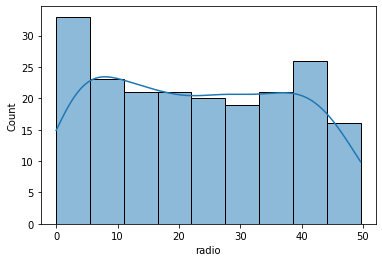

In [13]:
sns.histplot(df['radio'],kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

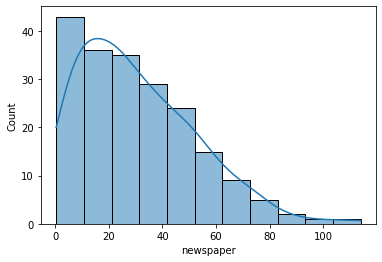

In [14]:
sns.histplot(df['newspaper'],kde=True)

<AxesSubplot:xlabel='TV', ylabel='radio'>

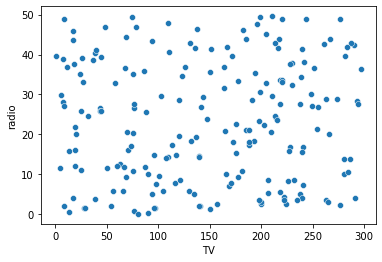

In [15]:
sns.scatterplot(x='TV',y='radio',data=df)

TV data is scatter is in range 2 to 300 and radio data is scatter is in range 2 to 50

<AxesSubplot:xlabel='TV', ylabel='newspaper'>

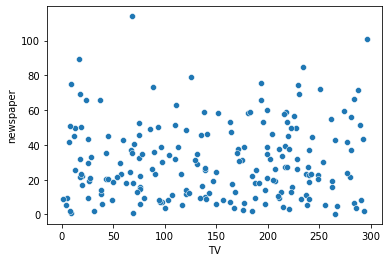

In [16]:
sns.scatterplot(x='TV',y='newspaper',data=df)

TV data is scatter is in range 2 to 300 and newspaper data is scatter is in range 2 to 100

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

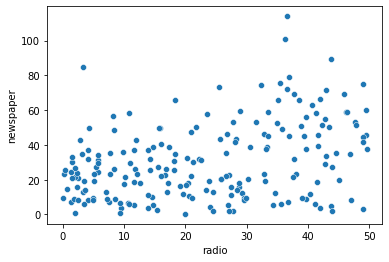

In [17]:
sns.scatterplot(x='radio',y='newspaper',data=df)

radio data is scatter is in range 2 to 50 and newspaper data is scatter is in range 2 to 100

<AxesSubplot:xlabel='TV', ylabel='sales'>

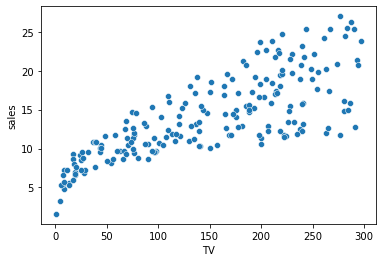

In [18]:
sns.scatterplot(x='TV',y='sales',data=df)

TV data has linear relationship with target  column sales.

<AxesSubplot:xlabel='radio', ylabel='sales'>

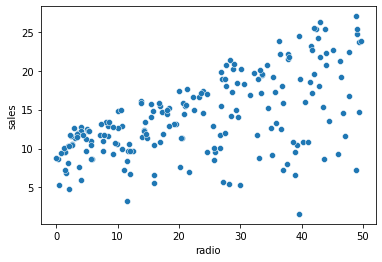

In [19]:
sns.scatterplot(x='radio',y='sales',data=df)

radio data has linear relationship with target column sales.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

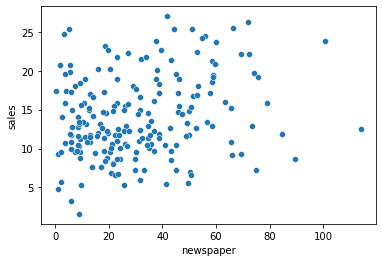

In [20]:
sns.scatterplot(x='newspaper',y='sales',data=df)

newspaper data is scattered respect to target column sales.

# Observation:


From the above observation, it is clear that the data are not normalised and we should proceed with the data cleaning method.

# Describe the data

In [21]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

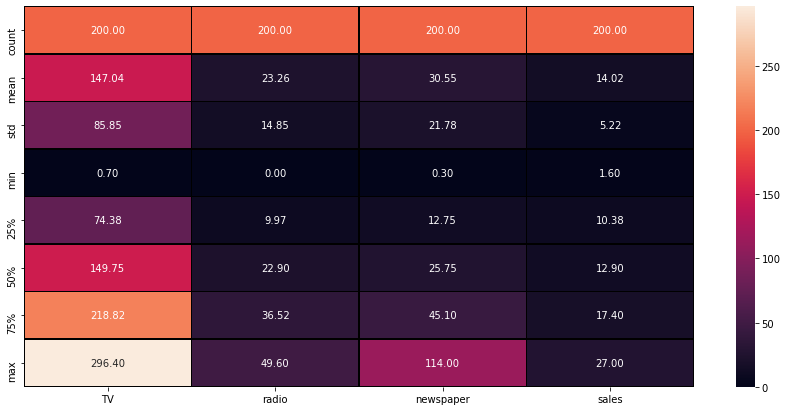

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column. It helps us further in data cleaning.

TV:

Mean=147.042500

std=85.854236

max_value=296.4

min_value=0.7

radio

Mean=23.264000

std=14.846809

max_value=49.6

min_value=0

newspaper

Mean=30.554000

std=21.778621

max_value=114

min_value=0.3

sales

Mean=14.022500

std=5.217457

max_value=27

min_value=1.6

# Correlation

In [23]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


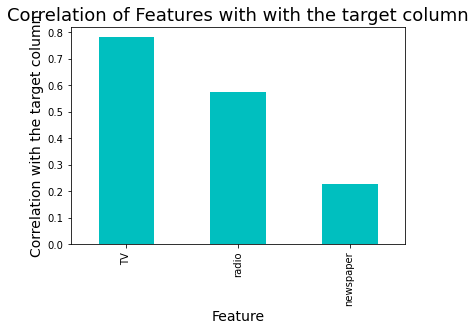

In [24]:
plt.figure()
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


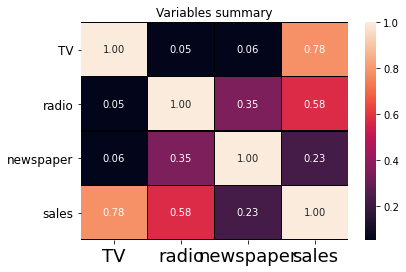

In [25]:
plt.figure()
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Skewness

In [26]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64


From the above observation the columns falls under high skewness:

    newspaper = 0.894720

# Data Transformation:

We need to transform those columns which has skewness.

# Outliers Check:

<AxesSubplot:>

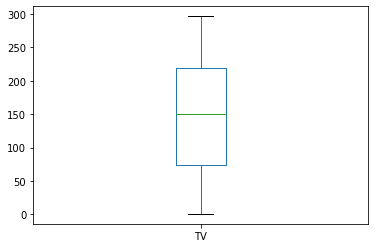

In [27]:
df['TV'].plot.box()

<AxesSubplot:>

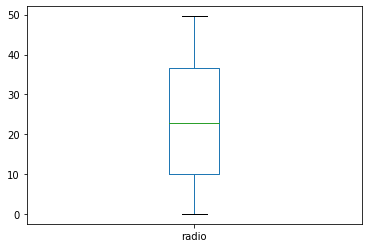

In [28]:
df['radio'].plot.box()

<AxesSubplot:>

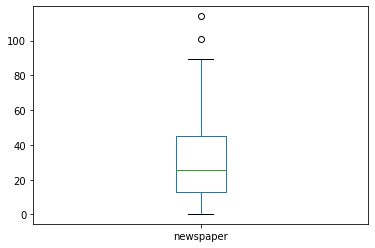

In [29]:
df['newspaper'].plot.box()

<AxesSubplot:>

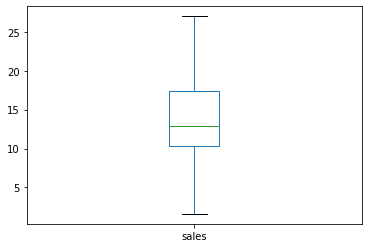

In [30]:
df['sales'].plot.box()

# Check the percentage of data falls under outliers:

In [31]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [32]:
df_new=df[(z<3).all(axis=1)]

In [33]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
df.shape

(200, 4)

# Percentage loss of data while removing outliers

In [35]:
percentage_loss=((2)/200)*100
print(percentage_loss)

1.0


# Since thepercentage of outliers are less than 5 percent.

We can proceed with the outliers removable.

Sometimes z-score unable to remove outliers. So we prefer IQR here over z-score.

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TV           144.450
radio         26.550
newspaper     32.350
sales          7.025
dtype: float64


In [37]:
df_new1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(198, 4)


In [38]:
percentage_loss=((200-198)/200)*100
print(percentage_loss)

1.0


The percentage loss in the z-score is same as that of IQR, so means this dataset has not that much outliersb are present.

In [39]:
x=df_new.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [40]:
y=df_new.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Removing skewness by transforming data.

In [41]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Regressor Model Building:

# Linear Regression:

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [43]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 112  The model performs very well
At random_state:- 112
Training r2_score is:- 90.17428654220274
Testing r2_score is:- 90.16708364952682
At random state 510  The model performs very well
At random_state:- 510
Training r2_score is:- 90.41100608643733
Testing r2_score is:- 90.41484328551749


In [44]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_t,y,random_state=510,test_size=0.20)

We will use random state 96

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization

# 1. Lasso:

In [46]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [47]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 90.14616379006017
R2_score is :- 90.73427448807215


At cv:- 3
Cross validation score is:- 89.72351383573026
R2_score is :- 90.73427448807215


At cv:- 4
Cross validation score is:- 89.80785666814384
R2_score is :- 90.73427448807215


At cv:- 5
Cross validation score is:- 89.57805874289184
R2_score is :- 90.73427448807215


At cv:- 6
Cross validation score is:- 89.81682352909685
R2_score is :- 90.73427448807215


At cv:- 7
Cross validation score is:- 89.46701250358076
R2_score is :- 90.73427448807215


At cv:- 8
Cross validation score is:- 89.81744733610321
R2_score is :- 90.73427448807215


At cv:- 9
Cross validation score is:- 89.36472532637083
R2_score is :- 90.73427448807215




In [48]:
print("At cv:-",2)
print("Cross validation score is:-",90.146 )
print("R2_score is :-",90.734)

At cv:- 2
Cross validation score is:- 90.146
R2_score is :- 90.734


In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [50]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 1.2554851904308837
Mean Squared Error: 2.7531342870846354
Root Mean Square Error: 1.6592571491738812


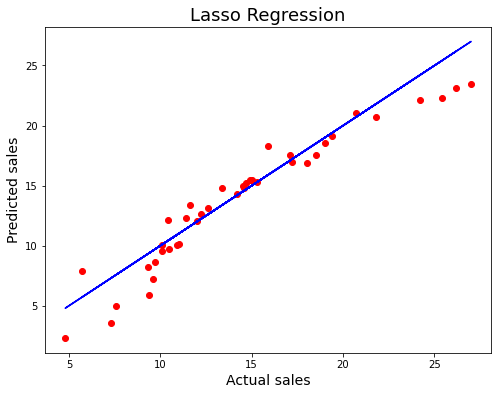

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

The above results shows that the datapoints near the best fit line. Trying model testing with different algorithm

# 2. Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [53]:
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x_t,y,cv=3)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 90.53994674638164
Cross Val Score: 89.73959487390134


In [54]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 1.2704347667414542
Mean Squared Error: 2.8108750833008727
Root Mean Square Error: 1.6765664565715468


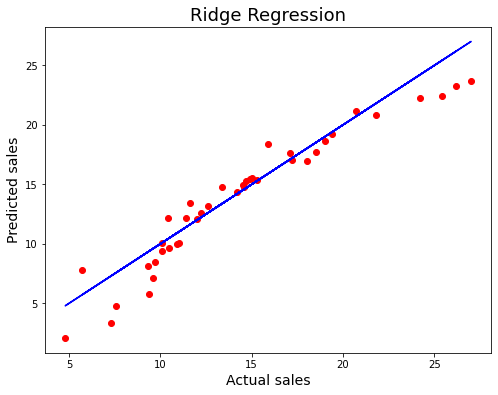

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# Ensemble Techniques:

In [56]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'random'}


In [57]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 94.96518370684984
Cross Val Score: 94.53060671561319


In [58]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 0.9199999999999999
Mean Squared Error: 1.4959999999999998
Root Mean Square Error: 1.2231107881136523


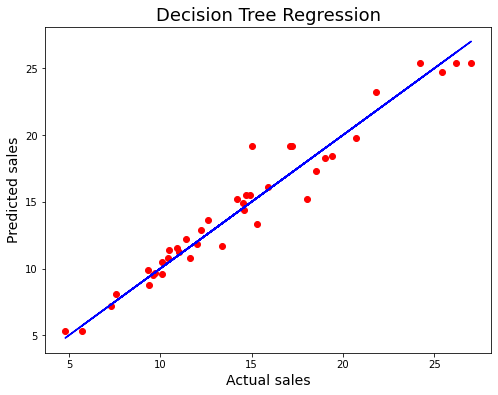

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [60]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['friedman_mse', 'mae'],'n_estimators':[100,200,300]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mae', 'n_estimators': 200}


In [61]:
rf = RandomForestRegressor(criterion='mae',n_estimators=200)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b, y_train_b)
pred_random = rf.predict(x_test_b)

rfs = r2_score(y_test_b,pred_random)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc = rfscore.mean() 
print('Cross Val Score:',rfc*100)

R2 Score: 98.42155663242809
Cross Val Score: 97.47239588237608


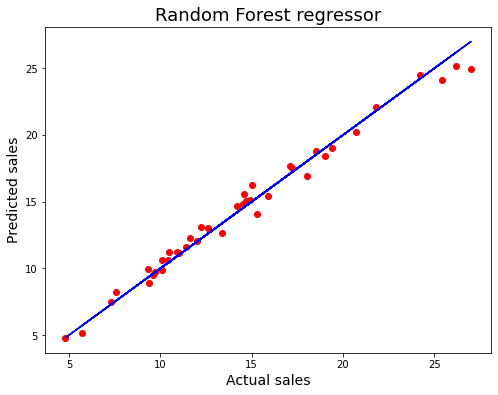

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

In [63]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'loss': 'ls', 'n_estimators': 200}


In [64]:
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=200)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = rf.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 98.42155663242809
Cross Val Score: 97.70650071770685


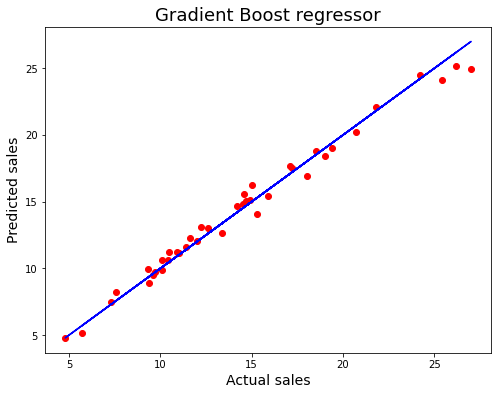

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [66]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'rbf'}


In [67]:
sv = SVR(kernel = 'rbf', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x_t,y,cv=3)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 89.99673881801968
Cross Val Score: 89.95004770726295


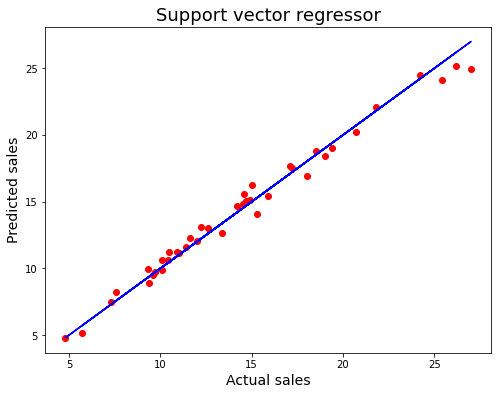

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is Gradient Boost regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving

In [69]:
import pickle
filename = 'in_advertising.pkl'
pickle.dump(gbr, open(filename, 'wb'))

# Conclusion

In [70]:
a=np.array(y_test)
a

array([20.2, 12.4, 11.9, 12.8, 12.2, 13.2, 26.2, 15. ,  5.7, 16. , 13.2,
        5.5,  8.8,  7.3,  8. , 11.7, 11.6, 20.7, 20.8,  7.3, 14.4, 10.8,
       19.7, 17. , 17.1, 18. , 24.7, 10.6,  9.3, 20.2, 14.9,  5.3, 11.5,
       22.3, 13.6, 14.6, 19.2, 19.4, 21.8, 11.3])

In [71]:
predicted=np.array(gbr.predict(x_test))
predicted

array([20.11389686, 12.31687015, 12.06491126, 12.77819047, 12.15888567,
       12.99619934, 25.39597605, 15.04283492,  5.88807315, 16.01375338,
       13.18352285,  5.44791774,  8.8156431 ,  6.83350218,  7.93198892,
       11.67319427, 11.49600654, 20.78309409, 20.8583916 ,  7.19878979,
       14.24991199, 10.85651799, 19.73757844, 16.92549281, 17.48853562,
       17.84339161, 24.70114675, 10.49355725, 10.09531733, 20.06482587,
       15.03936822,  5.29496118, 11.6139616 , 22.26371843, 13.69686499,
       15.34891181, 19.13066687, 19.83082014, 22.65541901, 11.31240697])

In [72]:
df_con=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_con

,original,predicted
0,20.2,20.113897
1,12.4,12.316870
2,11.9,12.064911
3,12.8,12.778190
4,12.2,12.158886
5,13.2,12.996199
6,26.2,25.395976
7,15.0,15.042835
8,5.7,5.888073
9,16.0,16.013753


# From the above table the model is predicted the values with 96 percent accuracy